## Code to generate Figure S1B-C graphics
Comparison of 'true' z = -2 and 'optimal' z = -1 parameters from simulations of the NHE1 TH4 peptide. The input text files were generated by calculating Rg per frame for merged pTH4 simulations with the desired charge states (panel B). We also compared per-residue helical fraction between the optimal and true charge states (panel C).The reported error is the standard deviation of the average helical fraction across replicates (n = 3-5).

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## load in files containing per-frame Rgs ##
T300 = np.loadtxt('data/pTH4_300K_Rg.txt')
T310 = np.loadtxt('data/pTH4_310K_Rg.txt')
T320 = np.loadtxt('data/pTH4_320K_Rg.txt')
T330 = np.loadtxt('data/pTH4_330K_Rg.txt')
T340 = np.loadtxt('data/pTH4_340K_Rg.txt')
T350 = np.loadtxt('data/pTH4_350K_Rg.txt')

T300z1 = np.loadtxt('data/pTH4_300K_Rg_z1.txt')
T310z1 = np.loadtxt('data/pTH4_310K_Rg_z1.txt')
T320z1 = np.loadtxt('data/pTH4_320K_Rg_z1.txt')
T330z1 = np.loadtxt('data/pTH4_330K_Rg_z1.txt')
T340z1 = np.loadtxt('data/pTH4_340K_Rg_z1.txt')
T350z1 = np.loadtxt('data/pTH4_350K_Rg_z1.txt')

frames = np.arange(1, len(T300)+1)

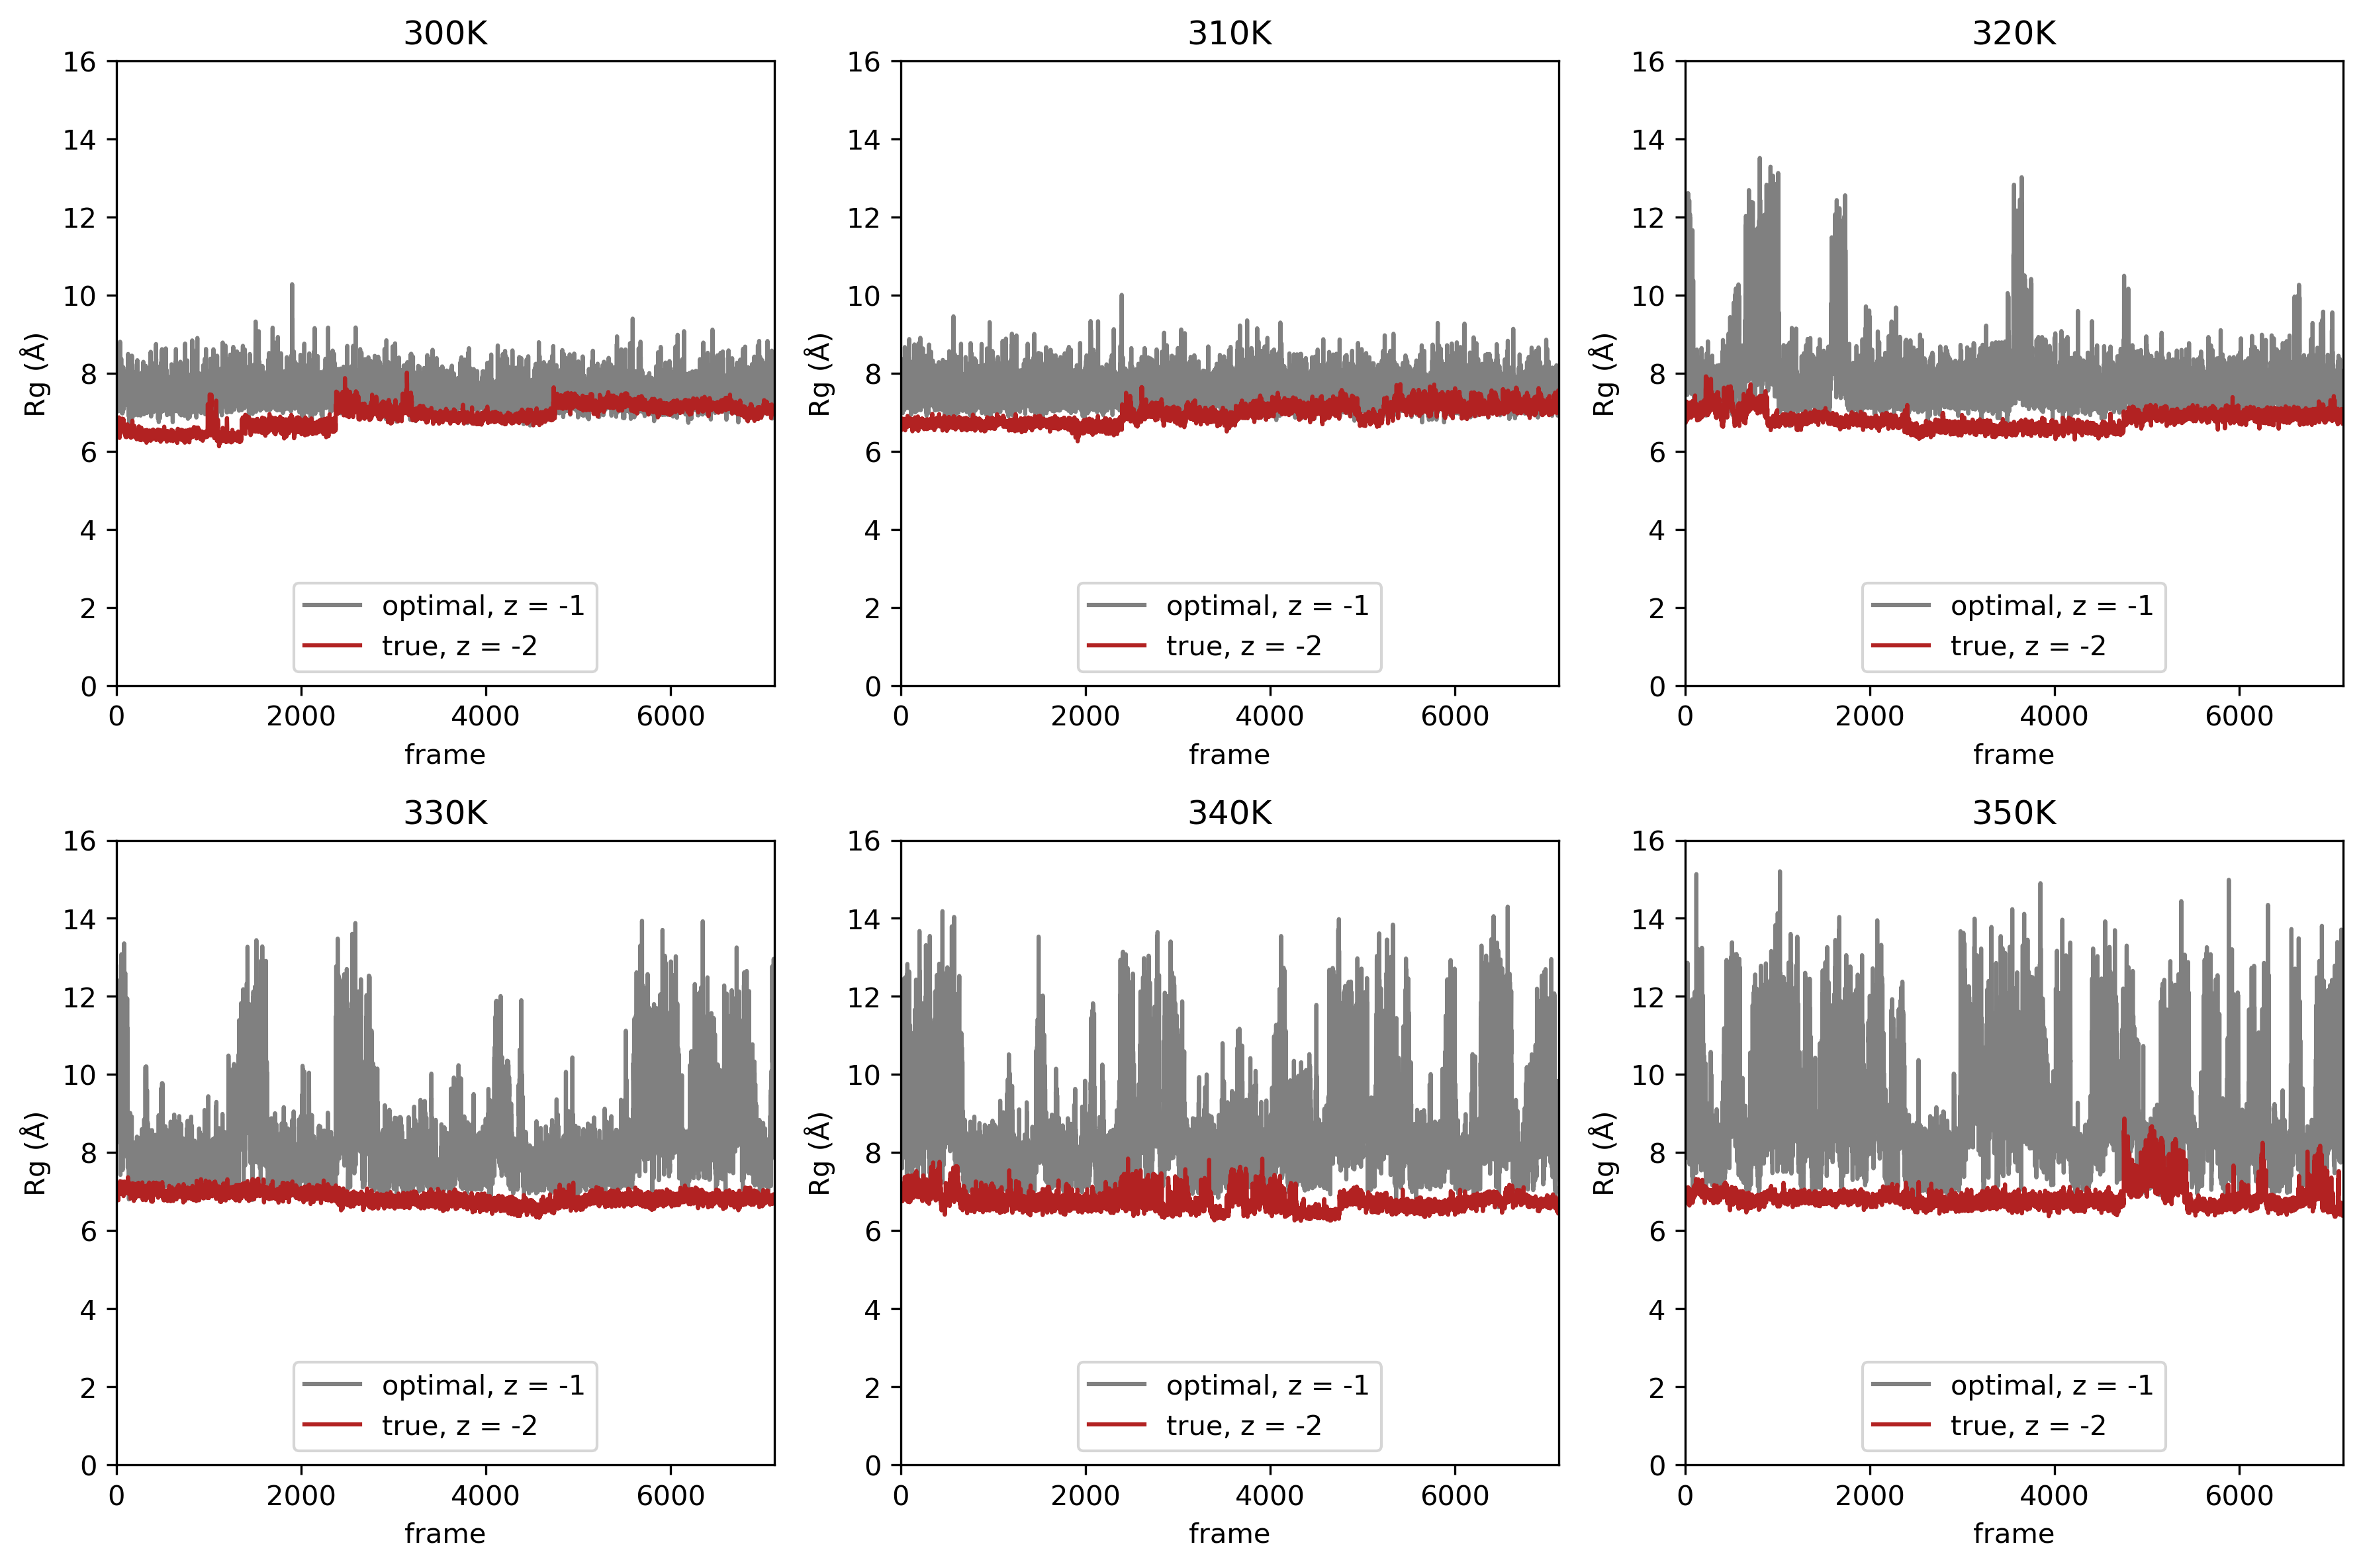

In [5]:
## generate plots of Rg vs. frame for different simulation temperatures (PANEL B) ##

fig, axs = plt.subplots(2, 3, figsize=(12, 8), dpi = 300)

# Plot data on each subplot
axs[0, 0].plot(frames, T300z1, color = 'grey', label = 'optimal, z = -1')
axs[0, 0].plot(frames, T300, color = 'firebrick', label = 'true, z = -2')
axs[0, 0].set_title('300K')

axs[0, 1].plot(frames, T310z1, color = 'grey', label = 'optimal, z = -1')
axs[0, 1].plot(frames, T310, color = 'firebrick', label = 'true, z = -2')
axs[0, 1].set_title('310K')

axs[0, 2].plot(frames, T320z1, color = 'grey', label = 'optimal, z = -1')
axs[0, 2].plot(frames, T320, color = 'firebrick', label = 'true, z = -2')
axs[0, 2].set_title('320K')

axs[1, 0].plot(frames, T330z1, color = 'grey', label = 'optimal, z = -1')
axs[1, 0].plot(frames, T330, color = 'firebrick', label = 'true, z = -2')
axs[1, 0].set_title('330K')

axs[1, 1].plot(frames, T340z1, color = 'grey', label = 'optimal, z = -1')
axs[1, 1].plot(frames, T340, color = 'firebrick', label = 'true, z = -2')
axs[1, 1].set_title('340K')

axs[1, 2].plot(frames, T350z1, color = 'grey', label = 'optimal, z = -1')
axs[1, 2].plot(frames, T350, color = 'firebrick', label = 'true, z = -2')
axs[1, 2].set_title('350K')

for i, ax in enumerate(axs.flat):
    ax.set_xlim(0, 7126)  # Set the x-axis range
    ax.set_ylim(0, 16)  # Set the y-axis range
    ax.set_xlabel('frame')
    ax.set_ylabel('Rg (Å)')
    ax.legend(loc = 'lower center')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('Rg_v_frame_pTH4_S1B.pdf', format = 'pdf', dpi = 300)

In [6]:
## load csv files with dssp helical fraction with per-replicate information ##

pTH4_z1 = np.loadtxt('data/pTH4_helicity_reps.csv', delimiter = ',')
pTH4_z2 = np.loadtxt('data/pTH4z2_helicity_reps.csv', delimiter = ',')

## calculate average/stddev for each dataset ##
# z1 == optimal parameters
# z2 == true z=-2 parameters

z1_avg = np.average(pTH4_z1, axis=0)
z1_std = np.std(pTH4_z1, axis=0)

z2_avg = np.average(pTH4_z2, axis=0)
z2_std = np.std(pTH4_z2, axis=0)

residue = np.arange(1, len(pTH4_z1.T)+1, 1)

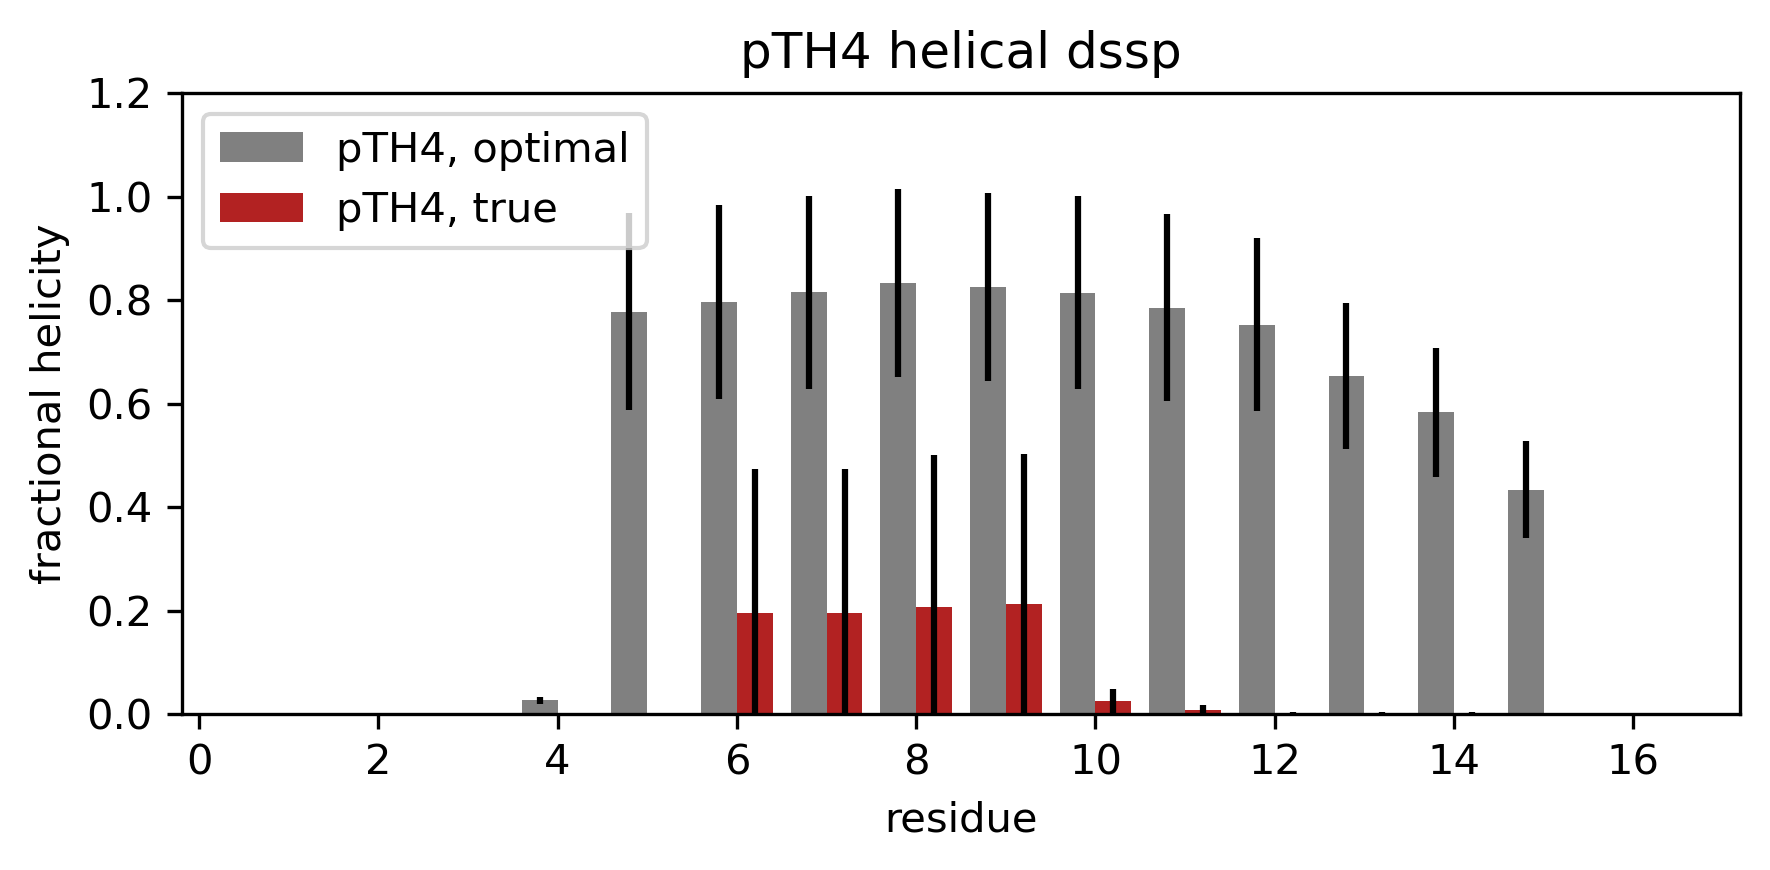

In [7]:
## plot ##
fig, ax = plt.subplots(figsize = (6, 3), dpi = 300)
width = 0.4

ax.bar(residue - width/2, z1_avg, width, yerr = z1_std, label = 'pTH4, optimal', color = 'grey')
ax.bar(residue + width/2, z2_avg, width, yerr = z2_std, label = 'pTH4, true', color = 'firebrick')

ax.set_xlabel('residue')
ax.set_ylabel('fractional helicity')
ax.set_title('pTH4 helical dssp')
ax.legend(loc = 'upper left')
ax.set_ylim([0, 1.2])

plt.tight_layout()
plt.savefig('pTH4_DSSP_comparison_S1C.pdf', format = 'pdf', dpi = 300)

plt.show()